# Visão Geral

A base utilizada trata da produção industrial mensal de eletricidade e gás natural nos Estados Unidos, abrangendo o período de 1985 a 2018

# Importação das bibliotecas e preparação dos dados

Importação das bibliotecas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Carregamento da base dados

In [4]:
base = pd.read_csv('./Electric_Production.csv')

Visão geral do dataset

In [5]:
base.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [6]:
base.shape

(397, 2)

In [7]:
base.dtypes

DATE           object
IPG2211A2N    float64
dtype: object

Transformação do dataset em uma série temporal

In [8]:
dateparser = lambda dates: pd.to_datetime(dates, format='%m/%d/%Y')
base = pd.read_csv('./Electric_Production.csv', parse_dates=['DATE'], index_col='DATE', date_parser=dateparser)

serie = base["IPG2211A2N"]
serie

<ipython-input-8-60350b1084a7>:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  base = pd.read_csv('./Electric_Production.csv', parse_dates=['DATE'], index_col='DATE', date_parser=dateparser)


DATE
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151
                ...   
2017-09-01     98.6154
2017-10-01     93.6137
2017-11-01     97.3359
2017-12-01    114.7212
2018-01-01    129.4048
Name: IPG2211A2N, Length: 397, dtype: float64

# Análise exploratória dos dados


Gráfico da série temporal completa

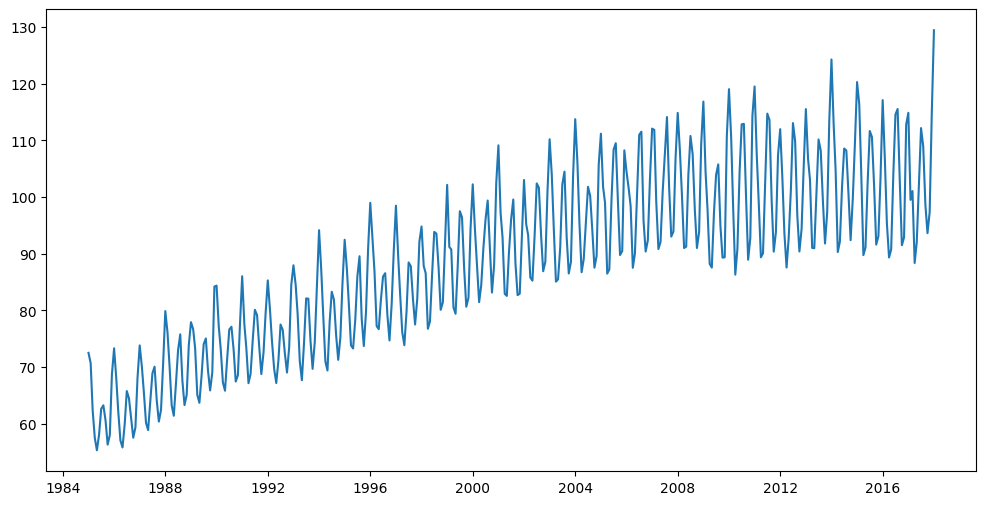

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(serie);

Histograma dos valores de produção de eletricidade e gás natural

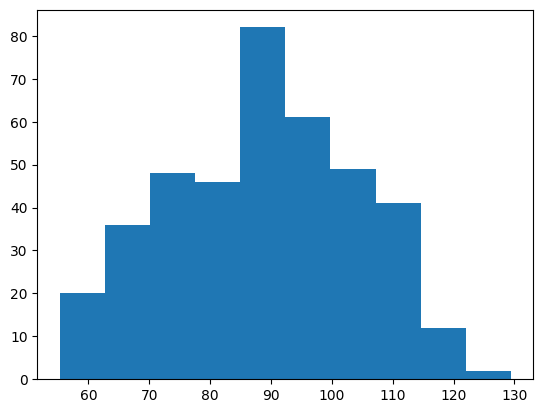

In [10]:
plt.hist(serie);

Boxplot dos valores de produção de eletricidade e gás natural

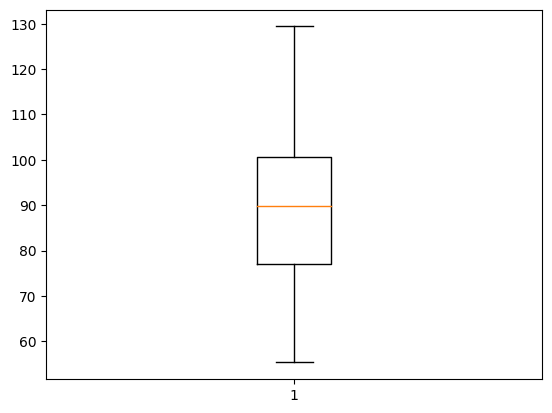

In [11]:
plt.boxplot(serie);

Decomposição da série temporal e análise dos componentes

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposicao = seasonal_decompose(serie)

In [13]:
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal
aleatorio = decomposicao.resid

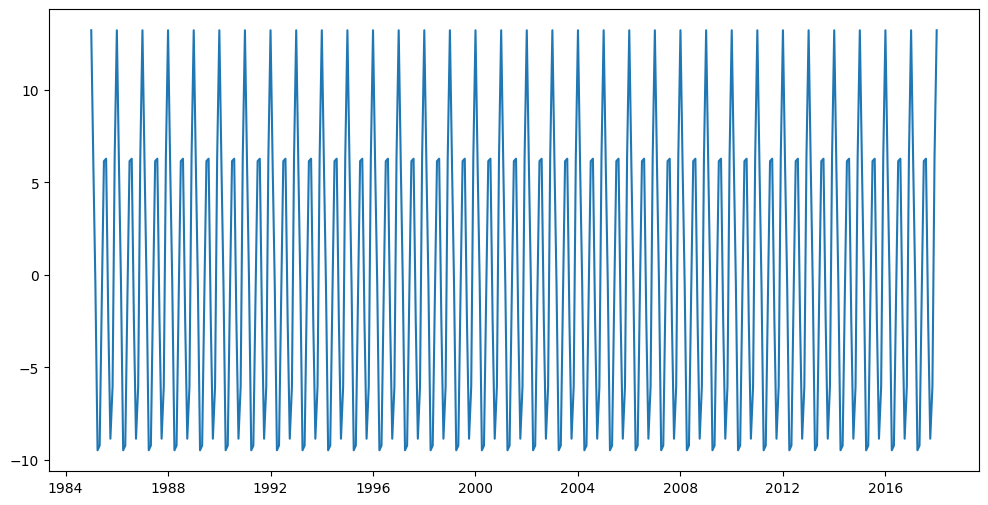

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(sazonal);

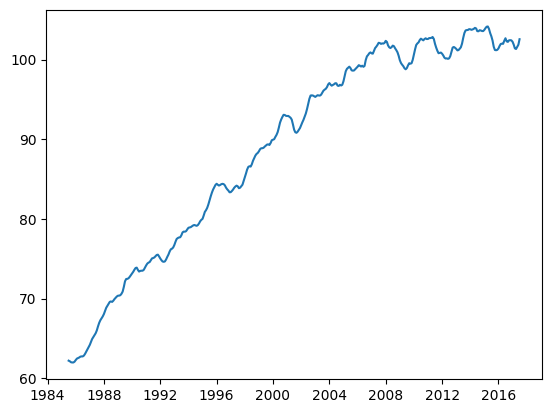

In [15]:
plt.plot(tendencia);

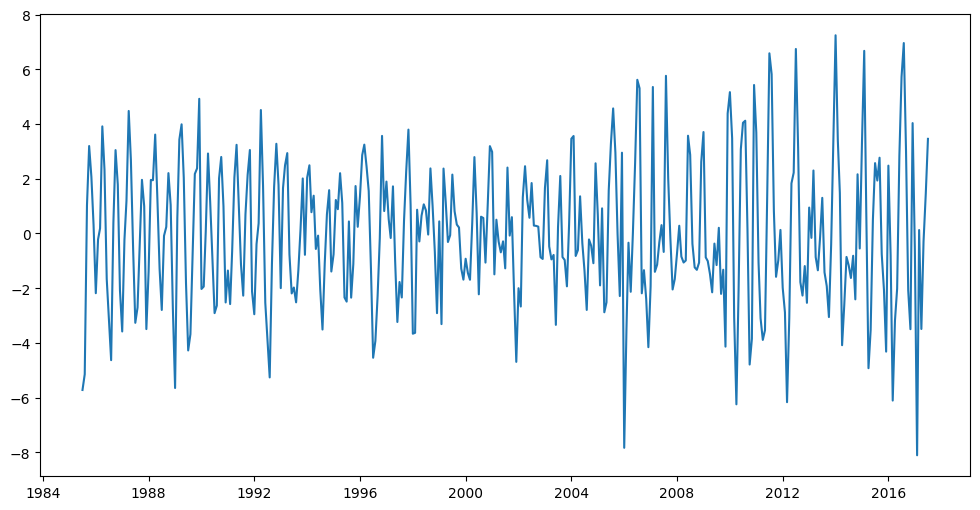

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(aleatorio);

# Treinamento e teste do modelo

In [17]:
len(serie)

397

Toda a série temporal tem 397 registros. Assim, serão destinados 361 registros para o treinamento do modelo e 36 registros para a testagem

In [18]:
train = serie[:361]
test = serie[361:]

In [19]:
print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())

1985-01-01 00:00:00 2015-01-01 00:00:00
2015-02-01 00:00:00 2018-01-01 00:00:00


Realizando o treinamento do modelo

In [22]:
from pmdarima import auto_arima
model = auto_arima(train, suppress_warnings=True)

Realizando previsões com o modelo

In [23]:
predictions = model.predict(n_periods=36)

predictions_df = pd.DataFrame(predictions, index=test.index)
predictions_df.columns = ['electric_production']

predictions_df.head()

,electric_production
DATE,
2015-02-01,116.303129
2015-03-01,104.110684
2015-04-01,95.535846
2015-05-01,99.197705
2015-06-01,111.423815


# Análise do modelo

Dados reais X previsões

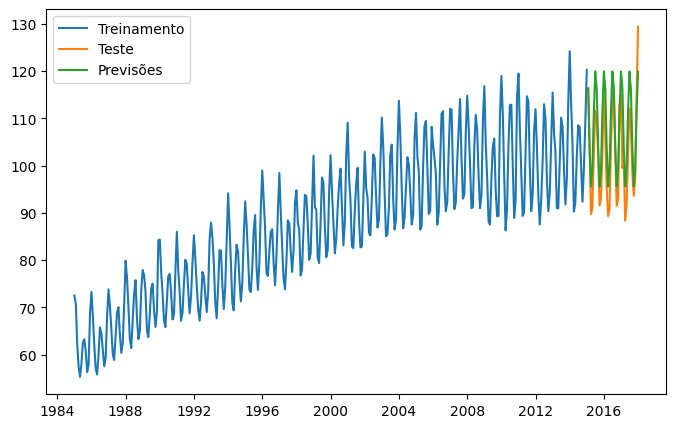

In [28]:
plt.figure(figsize=(8,5))
plt.plot(train, label = 'Treinamento')
plt.plot(test, label = 'Teste')
plt.plot(predictions_df, label = 'Previsões')
plt.legend();

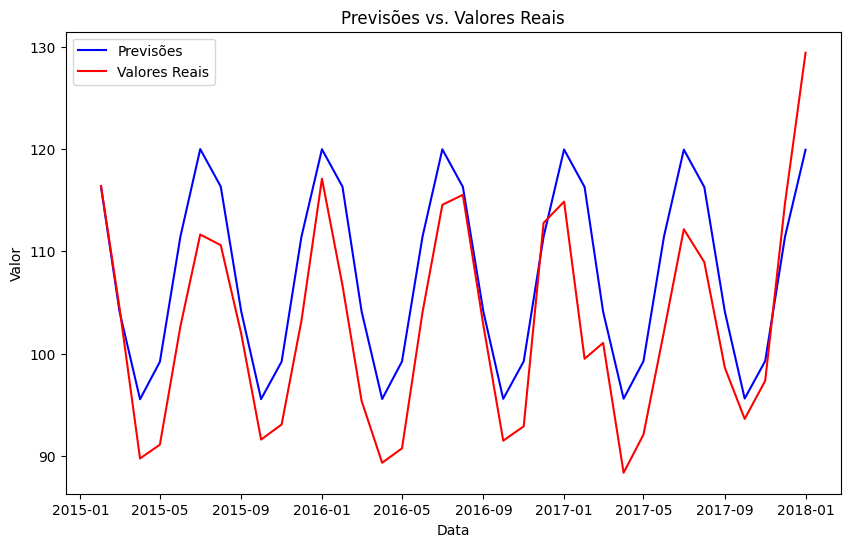

In [32]:
datas = predictions_df.index

plt.figure(figsize=(10, 6))
plt.plot(datas, predictions, label='Previsões', color='blue')
plt.plot(datas, test, label='Valores Reais', color='red')
plt.title('Previsões vs. Valores Reais')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.show()

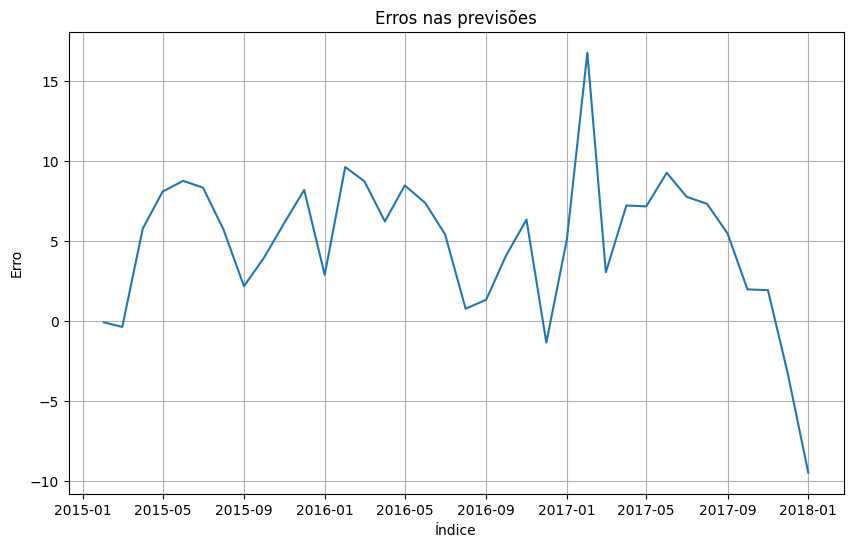

In [33]:
erro = predictions - test

plt.figure(figsize=(10, 6))
plt.plot(erro)
plt.title('Erros nas previsões')
plt.xlabel('Índice')
plt.ylabel('Erro')
plt.grid(True)
plt.show()